<img src='https://n1s1.hsmedia.ru/df/dc/eb/dfdceb842a1a67240ce7ec2bcb6688d0/1434x1200_1_55d4c5bb657db68504e4e4726eefa7bb@2148x1798_0x43r8yxu9_6443901409871986145.png.webp'>

# Нейронные сети








### Физиологическая модель нейрона

Нейрон (нервная клетка) состоит из:
- тела клетки (cell body),
- внешних ветвей:
    - аксона (axon)
    - дендритов (dendrites).

Тело клетки включает:
- ядро (nucleus), которое содержит информацию о наследственных свойствах,
- плазму, обладающую молекулярными средствами для производства необходимых нейрону материалов.

Нейрон получает сигналы (импульсы) от других нейронов через дендриты (приемники) и передает сигналы, сгенерированные телом клетки, вдоль аксона (передатчик), который в конце разветвляется на волокна (strands). На окончаниях этих волокон находятся синапсы (synapses).

Кора головного мозга человека :
 - поверхностью толщиной от 2 до 3 мм с площадью около 2200 см2.
 - 10^11 нейронов.
 - нейрон связан с 10^3 – 10^4 другими нейронами.
 - мозг человека содержит приблизительно от 10^14 до 10^15 взаимосвязей.


In [64]:
from IPython.display import Image

<img src='https://drive.google.com/uc?export=view&id=1CHbSfdsKulHIFhb93h_cevvb6ApaSNTx'>


## Формальные модели нейрона

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Нейрон МакКалока-Питтса

<img src='https://drive.google.com/uc?export=view&id=1y5ee6Wz6kTMEDpmbc76omk6jXQt2mmmn'>


Построим пример обработки входного х как в нейроне

In [66]:
x = np.array([1,0])
w = np.array([1,-1])

y = np.sign(np.dot(w, x.T )-9.3)
print(y)

-1.0


Посторим нейрон порогового типа

In [136]:
def McCuloh_Pitts_neuron(x = None, w = None, bias = 0):
    # w - веса
    # x - входы
    s = x @ w + bias
    y = np.sign(s)
    #ind_ = np.where(s>0)[0]
    #y=np.zeros(x.shape[0])
    #y[ind_]=1
    return y

Запустим нейрон на примре х с весами w

In [138]:
x = np.array([1,0])
w = np.array([1,-1])

y_out = McCuloh_Pitts_neuron(x = x, w = w, bias = -0.3)
print('ответ нейрона',y_out)

ответ нейрона 1.0


Подадим много примеров через х и получим много ответов

In [139]:
x = np.random.random((10,2))
w = np.array([1,-1])
y_out1 = McCuloh_Pitts_neuron(x = x, w = w, bias = 0.3)
print('ответ нейрона',y_out1)

ответ нейрона [ 1.  1. -1.  1.  1.  1.  1.  1.  1.  1.]


### **Задание 1**
1.1 собрать реализацию модели нейронов с функцией активации:
- линейной
- сигмоидной
- тангенциальной
- сложной сигмоидной 

1.2 построить визуализацию выходов на одинаковом множестве входов

1.3 перечислить достоинства и недостатки активаций

### Линейный нейрон

Линейный нейрон связывает входы в форме y = XW + b

Сделать реализацию функции linear_neuron(x: float = None, w: float = None, bias: float = 0) , где х - входы, w - веса, b - сдвиг

In [99]:
def linear_neuron(x, w, bias=0):
    if x.ndim == 1:
        x = x.reshape(1, -1)  
    return x @ w + bias

Запустим нейрон на множестве примеров в х

In [140]:
x = np.random.random((10,2))
w = np.array([1,-1])
y_out1 = linear_neuron(x = x, w = w, bias = 0.3)
print('ответ нейрона',y_out1)

ответ нейрона [0.05923765 0.9095968  1.07210613 0.29032172 1.03371904 0.72503389
 1.01859689 0.27598851 0.2256952  1.0386702 ]


### Сигмоидный нейрон

Строим сигмоидный нейрон логистический как s = X W + b, y = 1/(1+ exp(-s))


sigmoid_neuron(x: float = None, w: float = None, bias: float = 0)

In [141]:
def sigmoid_neuron(x: float = None, w: float = None, bias: float = 0):
    y_pred = x @ w + bias
    exp_y_pred = np.exp(-y_pred)
    return 1./(1 + exp_y_pred)

Строим сигмоидный нейрон тангенциальный как s = X W + b, y = 2/(1+ exp(-s))-1

sigmoidt_neuron(x: float = None, w: float = None, bias: float = 0)

In [142]:
def sigmoidt_neuron(x: float = None, w: float = None, bias: float = 0):
    y_pred = x @ w + bias
    th = 2./(1+np.exp(-2*y_pred)) - 1
    return th

Запустим нейрон

In [143]:
y_out2 = sigmoidt_neuron(x = x, w = w, bias = 0.3)
print('ответ нейрона',y_out2)

ответ нейрона [0.05916846 0.72093867 0.79025339 0.2824309  0.77539563 0.62001773
 0.76929442 0.26918831 0.22193953 0.7773624 ]


Запустим все нейроны на множестве примеров (линейно равномерно распределены в интервале от -10 до 10)

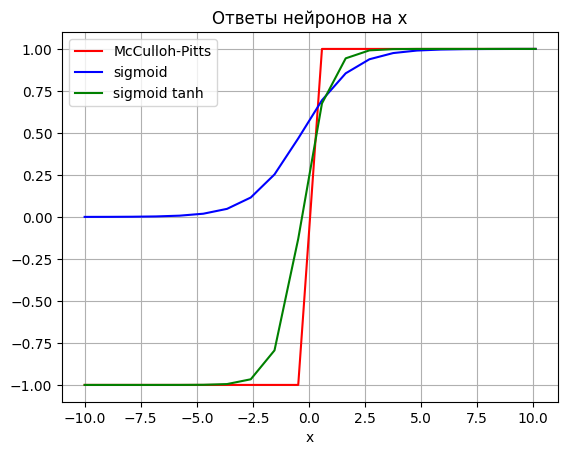

In [148]:
x = np.linspace(-10,10.1,20).reshape((20,1))
w = np.array([0.9]).reshape((1,1))
bias =0.3

y_out1 = McCuloh_Pitts_neuron(x = x, w = w, bias = 0.3)
y_out2 = sigmoid_neuron(x = x, w = w, bias = 0.3)
y_out3 = sigmoidt_neuron(x = x, w = w, bias = 0.3)
y_out4 = linear_neuron(x = x, w = w, bias = 0.3)

plt.plot(x[:,0], y_out1[:,0],'r', label='McCulloh-Pitts')
plt.plot(x[:,0], y_out2[:,0], 'b', label='sigmoid')
plt.plot(x[:,0], y_out3[:,0], 'g', label='sigmoid tanh')

plt.legend()
plt.title('Ответы нейронов на х')
plt.xlabel('x')
plt.grid()
plt.show()

Отвеы нейронов для разных нейронов

Пороговый:

In [152]:
y_out1

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

Сигмоидный нейрон:

In [153]:
y_out2

array([[1.66558065e-04],
       [4.31464081e-04],
       [1.11722503e-03],
       [2.88977058e-03],
       [7.45358282e-03],
       [1.90870489e-02],
       [4.79997991e-02],
       [1.15549948e-01],
       [2.52908880e-01],
       [4.67283653e-01],
       [6.94459739e-01],
       [8.54849947e-01],
       [9.38501009e-01],
       [9.75334342e-01],
       [9.90334440e-01],
       [9.96247521e-01],
       [9.98548470e-01],
       [9.99439314e-01],
       [9.99783541e-01],
       [9.99916452e-01]])

Сигмоидный тангенциальный нейрон:

In [154]:
y_out3

array([[-0.99999994],
       [-0.99999963],
       [-0.9999975 ],
       [-0.9999832 ],
       [-0.99988722],
       [-0.99924302],
       [-0.99492855],
       [-0.96643608],
       [-0.79436723],
       [-0.13030748],
       [ 0.67564239],
       [ 0.9439545 ],
       [ 0.99144863],
       [ 0.99872171],
       [ 0.99980951],
       [ 0.99997163],
       [ 0.99999577],
       [ 0.99999937],
       [ 0.99999991],
       [ 0.99999999]])

Усложним сигмоидный нейрон сигмоид с коэффициентом наклона

sigmoidt_complex_neuron(x:float=None, w:float=None, bias:float=0, lymbd:float=1)

In [155]:
def sigmoidt_complex_neuron(x:float=None, w:float=None, bias:float=0, lymbd:float=1):
    y_pred = x @ w + bias    
    return 1./(1 + np.exp(-lymbd * y_pred))  

Посмотрим на работу нейнона

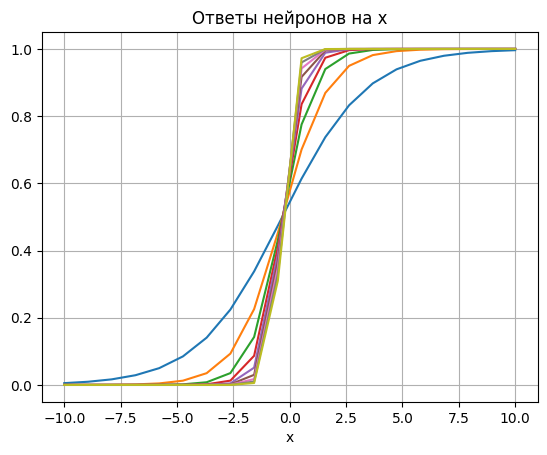

In [156]:
x = np.linspace(-10,10,20).reshape((20,1))
w = np.array([0.9]).reshape((1,1))
bias =0.3

for i in range(1, 10):
    y_out3 = sigmoidt_complex_neuron(x = x, w = w, bias = 0.3, lymbd=0.1+i*0.5)
    plt.plot(x[:, 0], y_out3[:, 0])

plt.title('Ответы нейронов на х')
plt.xlabel('x')
plt.grid()
plt.show()

### **Задание 2**

2.1. Визуализировать выход 2хмерного нейрона в разных вариантах активаций

**Двухмерный нейрон**

строим поле координат 10х10

In [157]:
x1 = np.array([np.linspace(-10,11,10).reshape((10,1))]*10).reshape((10,10))
x2 = x1.T
x2=x2.reshape((100,1))
x1=x1.reshape((100,1))
print(x1[:3])
print(x2[:3])

x = np.hstack([x1,x2])

[[-10.        ]
 [ -7.66666667]
 [ -5.33333333]]
[[-10.]
 [-10.]
 [-10.]]


Разменость данных

In [158]:
x.shape
w1 = np.array([0.9, -0.9])
w1.shape

(2,)

Строим поверхность двухмерного нейрона  (чем желтее, тем ближе к 1, чем синее, тем ближе к -1)

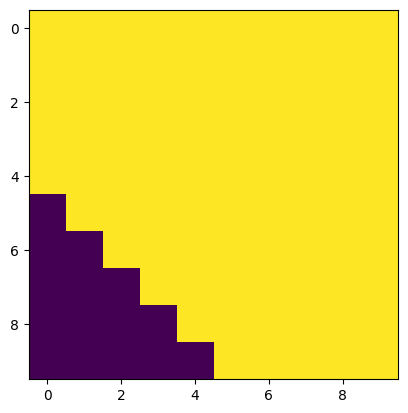

In [159]:
w = np.array([0.9, -0.9])

y_out_21 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)

y_out_21 = y_out_21.reshape((10,10))

plt.imshow((y_out_21))
plt.show()

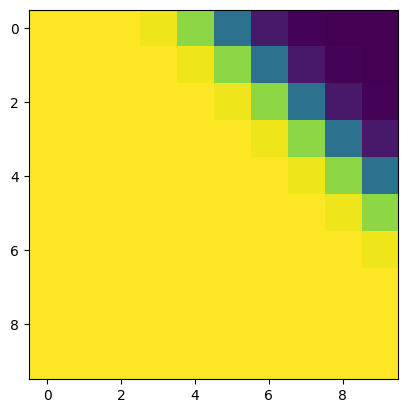

In [160]:
w = np.array([-0.9, 0.9])

y_out_22 = sigmoid_neuron(x = x, w = w, bias = 10)

y_out_22 = y_out_22.reshape((10,10))

plt.imshow((y_out_22 ))
plt.show()

Сигмоидный нейрон на том же пространстве

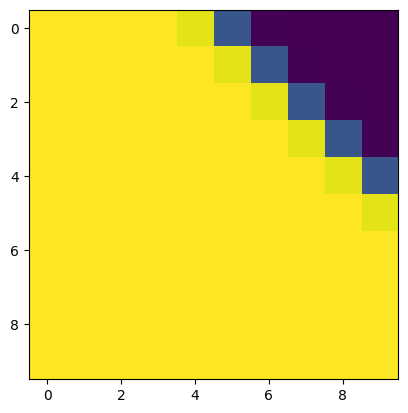

In [161]:
w = np.array([-0.9, 0.9])

y_out_23 = sigmoidt_neuron(x = x, w = w, bias = 10)

y_out_23 = y_out_23.reshape((10,10))

plt.imshow((y_out_23 ))
plt.show()

И еще один нейрон

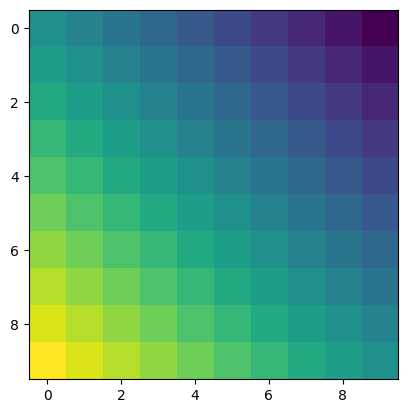

In [162]:
w = np.array([-0.9, 0.9])

y_out_24 = linear_neuron(x = x, w = w, bias = 10)

y_out_24 = y_out_24.reshape((10,10))

plt.imshow((y_out_24))
plt.show()

И еще один нейрон

Все нейроны отличаются весами, что приводит к разным выходам.

### **Задание 3**

3.1. Сделать реализацию обучения по Дельта-правилу(правило Вудро-Хофа) для линейного нейрона

3.2. Сделать реализацию обучения по Дельта-правилу для сигмоидного нейрона

3.3. визуализировать результат обучения для набора данных : 

**# входное пространство**

x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])

x = np.vstack([x1,x2]).T

**# целевые значения для входов**

D=np.array([1,1,-1,-1])

**Обучение линейного нейрона**

1. Задать начальное состояние
2. Взять пример j из набора примеров
3. Вычислить выход нейрона для этого примера
4. Вычислить коррекцию синаптических весов для всех входов xi

dwi = - n (y(Хj) - dj) xi

5. Вычислить новый уровень wi
wi = wi +  dwi

6. Перейти к новому примеру в п.2
7. Если просмотрели все примеры, то проверить условие конца (ошибка модели или число повторов):
    - условие выполнено - конец
    - условие не выполнено - начинаем просматривать примеры и изменять веса сначала (j=0) и к п.2
    


Эпоха - просмотр всех примеров из набора

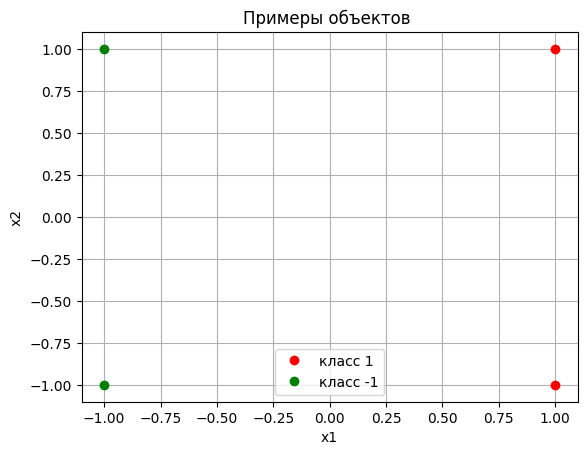

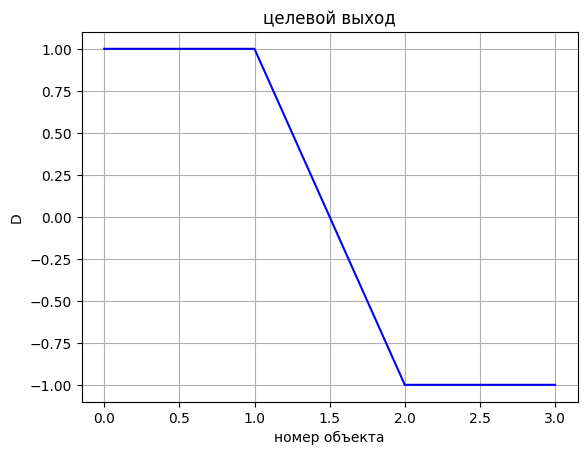

In [441]:
# входное пространство
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])

x = np.vstack([x1,x2]).T

# целевые значения для входов
D=np.array([1,1,-1,-1])
# нарисуем
plt.plot(x1[:2],x2[:2], 'or', label = 'класс 1')
plt.plot(x1[2:4],x2[2:4], 'og', label = 'класс -1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Примеры объектов ')
plt.grid()
plt.show()

plt.plot(D, 'b')
plt.title('Примеры значений класса ')
plt.title('целевой выход')
plt.xlabel('номер объекта')
plt.ylabel('D')
plt.grid()
plt.show()

Посмотрим на входы

In [165]:
x.shape

(4, 2)

Научим нейрон понимать эти примеры

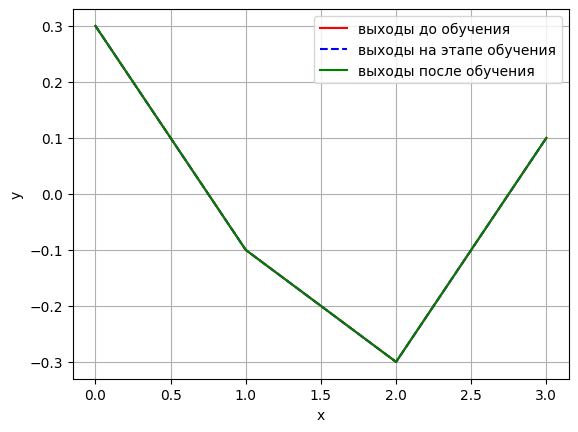

In [442]:
# Начальные веса
w=np.array([0.1, 0.2])

#yt = sigmoid_neuron(x = x, w = w, bias = 0)
yt = linear_neuron(x = x, w = w, bias = 0)
plt.plot(yt, 'r', label = 'выходы до обучения')


## реализовать обучение нейрона

plt.plot(yt,'--b', label = 'выходы на этапе обучения')
plt.plot(yt,'g', label = 'выходы после обучения')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

**Обучение линейного нейрона**

1. Задать начальное состояние
2. Взять пример j из набора примеров
3. Вычислить выход нейрона для этого примера
4. Вычислить коррекцию синаптических весов для всех входов xi

dwi = - n (y(Хj) - dj) xi

5. Вычислить новый уровень wi
wi = wi +  dwi

6. Перейти к новому примеру в п.2
7. Если просмотрели все примеры, то проверить условие конца (ошибка модели или число повторов):
    - условие выполнено - конец
    - условие не выполнено - начинаем просматривать примеры и изменять веса сначала (j=0) и к п.2
    


Эпоха - просмотр всех примеров из набора

In [196]:
class ClassifierGD:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tol = 0.001
        self.random_state = 42
        self.npr = np.random.RandomState(self.random_state)
        self.w = None
        self.bias = None
        self.predicts = []
        self.epochs = 1
    
    def get_loss(self, X, y):
        n = X.shape[0]
        return (X @ self.w + self.bias - y).T @ (X @ self.w + self.bias - y) / n
    
    def get_loss_grad(self, X, y):
        n = X.shape[0]
        return 2 * X.T @ (X @ self.w + self.bias - y) / n
    
    def get_loss_grad_bias(self, X, y):
        n = X.shape[0]
        return 2 * (self.bias * n + np.sum(X @ self.w) - np.sum(y)) / n
    
    def fit(self, X, y, w = None, b = None):
        if w is None:
            self.w = self.npr.uniform(-2, 2, size=X.shape[1])
        else:
            self.w = w
        if b is None:
            self.bias = self.npr.uniform(-2, 2, size=1)[0]
        else:
            self.bias = b
        x_train, y_train = X, np.asarray(y).ravel()
        loss = self.get_loss(x_train, y_train)
        best_loss = np.inf
        current_iter = 1
        self.predicts.append(self.predict(X))
        
        while current_iter < self.n_iter and best_loss - loss >= self.tol:
            best_loss = loss
            grad = self.get_loss_grad(x_train, y_train)
            w_new = self.w - self.learning_rate * grad
            self.w = w_new
            bias_new = self.bias - self.learning_rate * self.get_loss_grad_bias(x_train, y_train)
            self.bias = bias_new
            loss = self.get_loss(x_train, y_train)
            y_pred = self.predict(X)
            self.predicts.append(y_pred)
            current_iter += 1
            
        self.epochs = current_iter
        final_accuracy = self.accuracy(X, y)
        print(f"Accuracy: {final_accuracy}")
    
    def predict(self, X):
        return X @ self.w + self.bias
    
    def predict_classes(self, X):
        return np.sign(X @ self.w + self.bias)
    
    def accuracy(self, X, y_true):
        y_pred_classes = self.predict_classes(X)
        return np.mean(y_pred_classes == y_true)
    
    def plot_predictions_evolution(self):
        plt.figure(figsize=(10, 6))
        
        plt.plot(self.predicts[0].flatten(), 'r-', linewidth=3, label='до обучения')
        
        for i in range(1, len(self.predicts)-1):
            plt.plot(self.predicts[i].flatten(), 'b--', alpha=0.6, linewidth=1)
        
        if len(self.predicts) > 1:
            plt.plot(self.predicts[-1].flatten(), 'g-', linewidth=3, label='после обучения')
        
        plt.title('Эволюция непрерывных выходов')
        plt.xlabel('Номер объекта')
        plt.ylabel('Выход нейрона')
        plt.legend()
        plt.grid()
        plt.show()
    
    def get_params(self):
        return {'weights': self.w, 'bias': self.bias, 'predicts': self.predicts, 'epochs': self.epochs}

Accuracy: 1.0


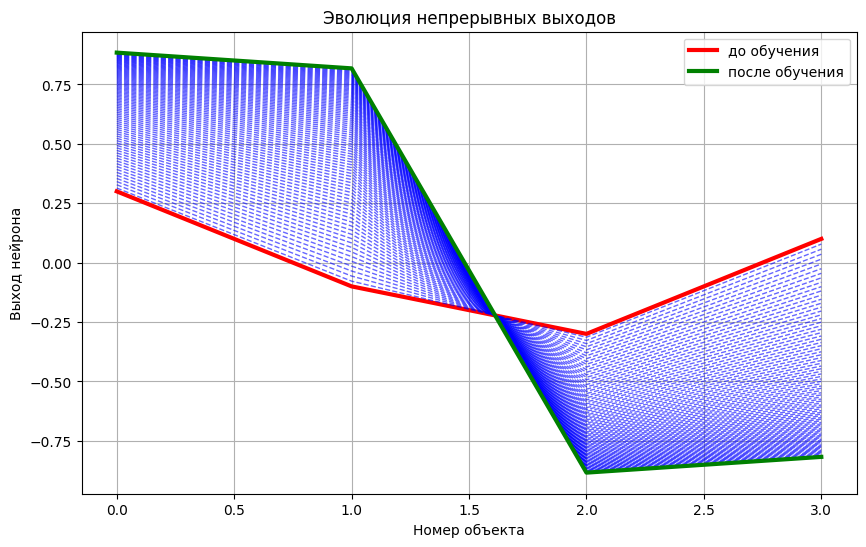

In [198]:
reg_gd = ClassifierGD(learning_rate=0.01, n_iter=200)
reg_gd.fit(x, D, w, 0)
reg_gd.plot_predictions_evolution()

In [443]:
class Linear:
    def __init__(self, input_size, output_size, W=None, b=None):
        if W is None:
            self.W = np.random.randn(input_size, output_size)*0.01
        else:
            self.W = W
        if b is None:
            self.b = np.zeros(output_size)
        else:
            self.b = b

    def forward(self, X):
        self.X = X
        return X.dot(self.W) + self.b

    def backward(self, dLdy):
        self.dLdW = self.X.T.dot(dLdy)
        self.dLdb = dLdy.sum(0)
        self.dLdx = dLdy.dot(self.W.T)
        return self.dLdx

    def step(self, learning_rate):
        self.W = self.W - learning_rate * self.dLdW
        self.b = self.b - learning_rate * self.dLdb

class Sigmoid:
    def __init__(self):
        pass

    def forward(self, X):
        self.s = 1./(1+np.exp(-X))
        return self.s

    def backward(self, dLdy):
        return self.s*(1-self.s)*dLdy

    def step(self, learning_rate):
        pass

class MSELoss:
    def __init__(self):
        pass

    def forward(self, y_pred, y):
        self.y_pred = y_pred.flatten()  
        self.y = y.flatten()            
        n = self.y.shape[0]
        return ((self.y_pred - self.y) ** 2).mean()

    def backward(self):
        n = self.y.shape[0]
        grad = 2 * (self.y_pred - self.y) / n
        return grad.reshape(-1, 1) 

class NLLLoss:
    def __init__(self):
        pass

    def forward(self, X, y):
        self.p = np.exp(X)
        self.p /= self.p.sum(1, keepdims=True)
        self.y = np.zeros((X.shape[0], X.shape[1]))
        self.y[np.arange(X.shape[0]), y] = 1
        return -(np.log(self.p)*self.y).sum(1).mean(0)

    def backward(self):
        return (self.p - self.y) / self.y.shape[0]

class SignAccuracy:
    def __init__(self):
        pass
        
    def forward(self, y_pred, y):
        y_pred_sign = np.sign(y_pred.flatten())
        return np.mean(y_pred_sign == y)

class ProbaAccuracy:
    def __init__(self):
        pass
        
    def forward(self, y_proba, y):
        y_pred_class = np.argmax(y_proba, 1)
        return np.mean(y_pred_class == y)

class NeuralNetwork:
    def __init__(self, modules):
        self.modules = modules

    def forward(self, X):
        y = X
        for i in range(len(self.modules)):
            y = self.modules[i].forward(y)
        return y

    def backward(self, dLdy):
        for i in range(len(self.modules))[::-1]:
            dLdy = self.modules[i].backward(dLdy)

    def step(self, learning_rate):
        for i in range(len(self.modules)):
            self.modules[i].step(learning_rate)

def train(X, y, network, epochs, tol, learning_rate, plot=True, loss=None, acc=None):
    loss = loss or MSELoss()
    acc = acc or SignAccuracy()
    train_loss_epochs = []
    train_accuracy_epochs = []
    predicts = []
    best_loss = np.inf
    epoch = 1

    while epoch < epochs:
        prediction = network.forward(X)
        predicts.append(prediction)
        loss_batch = loss.forward(prediction, y)
        
        #if best_loss - loss_batch < tol:
        #    break
            
        best_loss = loss_batch
        
        dLdx = loss.backward()
        network.backward(dLdx)
        network.step(learning_rate)
        
        accuracy = acc.forward(network.forward(X), y)
        
        train_loss_epochs.append(loss_batch)
        train_accuracy_epochs.append(accuracy)
        
        epoch += 1

    predicts.append(network.forward(X))
        
    print(f"Accuracy: {train_accuracy_epochs[-1]}")
    return predicts


def plot_predictions(predicts):
    plt.figure(figsize=(10, 6))
    
    plt.plot(predicts[0].flatten(), 'r-', linewidth=3, label='до обучения')
    
    for i in range(1, len(predicts)-1):
        plt.plot(predicts[i].flatten(), 'b--', alpha=0.6, linewidth=1)
    
    if len(predicts) > 1:
        plt.plot(predicts[-1].flatten(), 'g-', linewidth=3, label='после обучения')
    
    plt.title('Эволюция непрерывных выходов')
    plt.xlabel('Номер объекта')
    plt.ylabel('Выход нейрона')
    plt.legend()
    plt.grid()
    plt.show()

In [444]:
w = np.array([[0.1], [0.2]])  
b = np.array([0.0])           
network = NeuralNetwork([
    Linear(2, 1, w, b)
])

Accuracy: 1.0


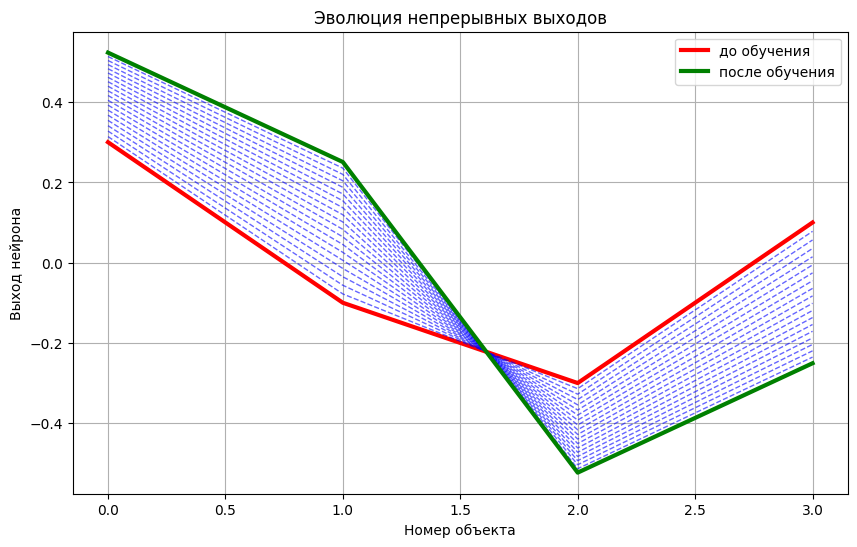

In [445]:
predicts = train(x, D, network, 20, 0.001, 0.01)
plot_predictions(predicts)

In [446]:
w = np.array([[-0.5, 0.1], [0.3, 0.2]])
b = np.array([0.01, -0.01])

network_sigm = NeuralNetwork([
    Linear(2, 2, w, b), Sigmoid()
])

Accuracy: 1.0


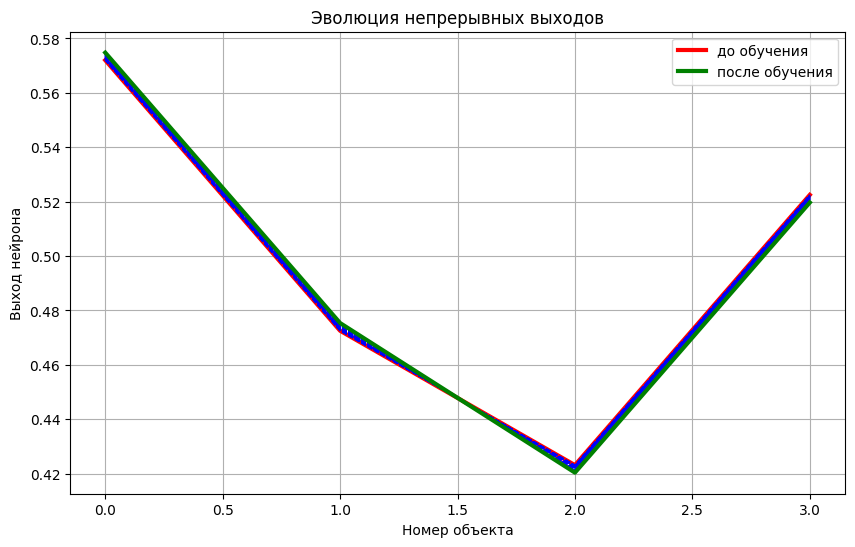

In [447]:
new_D = (D + 1) // 2
predicts = train(x, new_D, network_sigm, 100, 10e-12, 0.001, loss=NLLLoss(), acc=ProbaAccuracy())
p = np.array(predicts)
plot_predictions(p[:, :, 1])

На графике видно, как изменяется выход нейрона при обучении (постепенно сдвигаем к целевому значению)

### **Задание 4**

4.1. визуализировать результат обучения для набора данных : 

**# входное пространство**

x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])

x = np.vstack([x1,x2]).T

**# целевые значения для входов**

D=np.array([1,-1,1,-1])

**Линейная разделимость**

Введем понятие разделимость :
- линейная - можно поделить линейной границей
- линейно не разделимая - нельзя провести линейную границу

<img src='https://drive.google.com/uc?export=view&id=1jysvUhdc4EvJHhTbliZGFq8fRl9-L1Ek'>


Приведем пример линейно не разделимой модели примеров

In [207]:
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])

x = np.vstack([x1,x2]).T
x

array([[ 1,  1],
       [ 1, -1],
       [-1, -1],
       [-1,  1]])

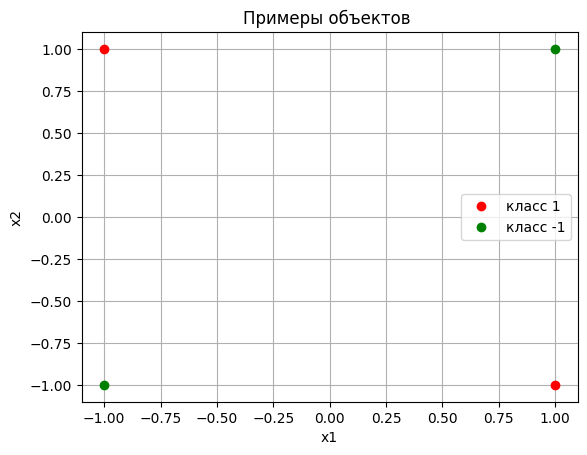

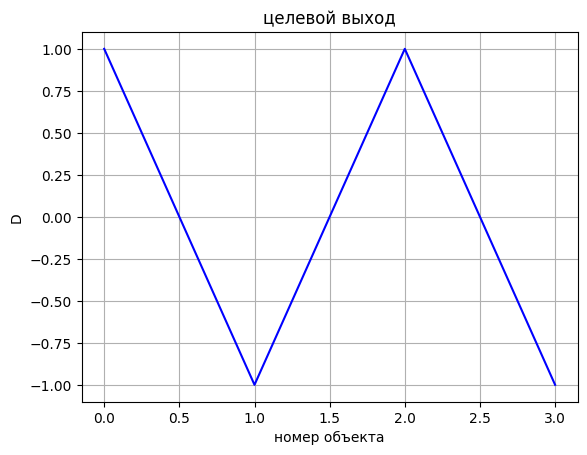

Accuracy: 0.5


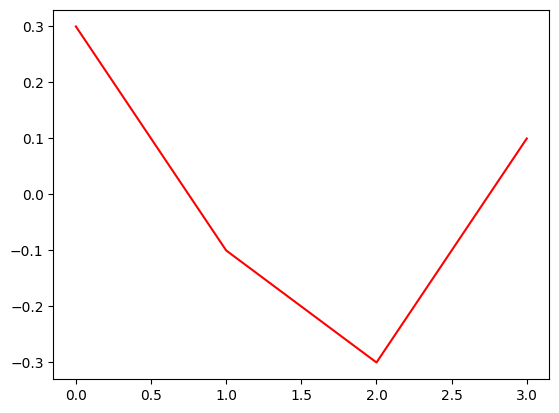

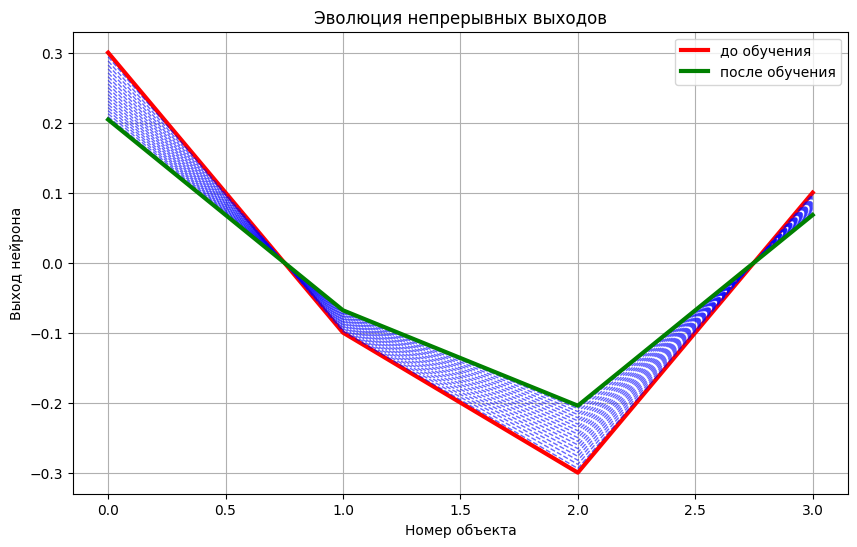

Accuracy: 0.75


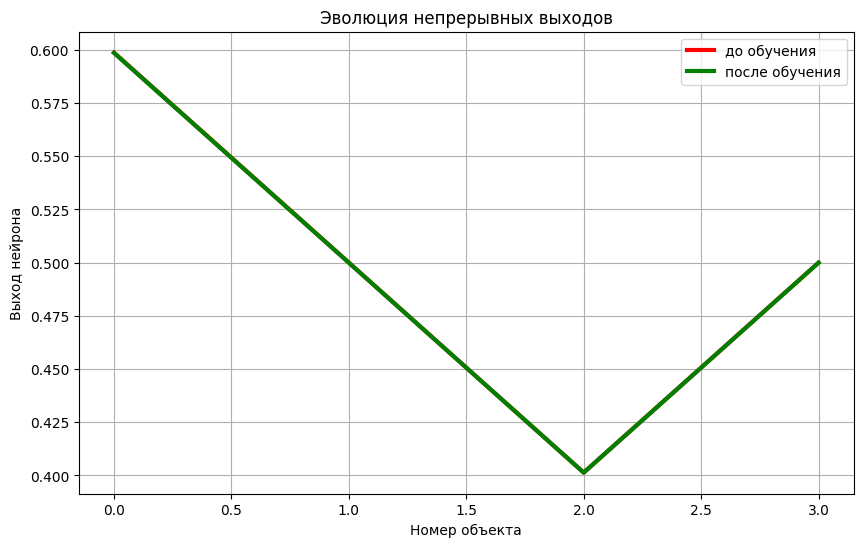

In [453]:
# зададим примеры на вход
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])

x = np.vstack([x1,x2]).T
# зададим примеры на выход
D=np.array([1,-1,1,-1])

plt.plot(x1[[1,3]],x2[[1,3]], 'or', label = 'класс 1')
plt.plot(x1[[0,2]],x2[[0,2]],'og', label = 'класс -1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Примеры объектов ')
plt.grid()
plt.show()

plt.plot(D, 'b')
plt.title('Примеры значений класса ')
plt.title('целевой выход')
plt.xlabel('номер объекта')
plt.ylabel('D')
plt.grid()
plt.show()

# Начальные веса
w=np.array([0.1, 0.2])

#yt = sigmoid_neuron(x = x, w = w, bias = 0)
yt = linear_neuron(x = x, w = w, bias = 0)


plt.plot(yt,'r' , label = 'выходы до обучения')

w = np.array([[0.1], [0.2]])  
b = np.array([0.0])           
network = NeuralNetwork([
    Linear(2, 1, w, b)
])
predicts = train(x, D, network, 20, 0.001, 0.01)
plot_predictions(predicts)

w = np.array([[0.1, 0.2], [0.1, 0.2]])
b = np.array([0.0, 0.0])

network_sigm = NeuralNetwork([
    Linear(2, 2, w, b), Sigmoid()
])

new_D = (D + 1) // 2
predicts = train(x, new_D, network_sigm, 100, 10e-4, 0.001, loss=NLLLoss(), acc=ProbaAccuracy())
p = np.array(predicts)
plot_predictions(p[:, :, 1])

Посмотрели на результаты и видим, что обучения не произошло и веса бросает туда-сюда:(. Нейрон не обучается (2 ошибки на 4 примера)

### **Задание 5**

5.1. Сделать комбинацию выходов нейронов (сигмоидных) с весами

5.2. визуализировать результат работы в двухмерном пространстве входов.

Можно строить сколько угодно сложные модели если :
- нейрон может это реализовать
- нейрон можно этому обучить

**Проверим, что можно построить из комбинаций нейронов:**

Скомбинируем нейроны y_out_21 и y_out_22

Accuracy: 0.75
Accuracy: 0.5


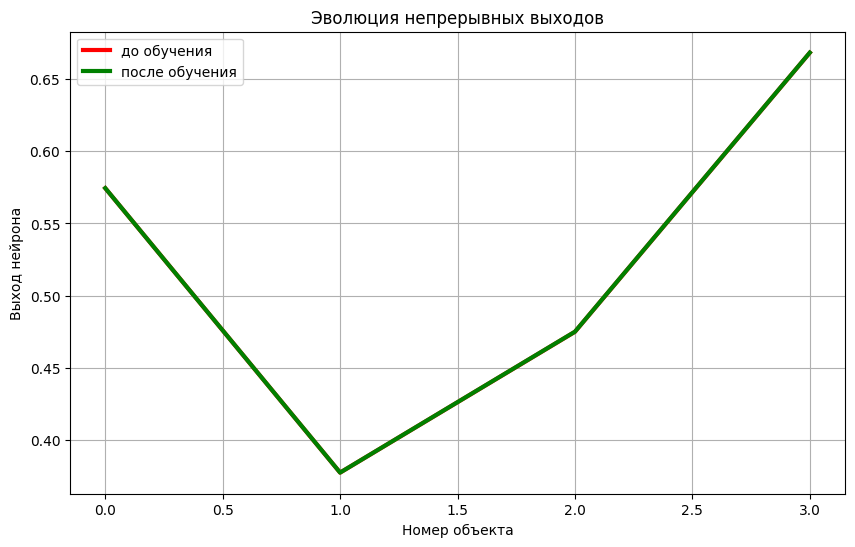

In [461]:
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,-1,1])
x = np.vstack([x1,x2]).T
D=np.array([1,-1,1,-1])
w1 = np.array([[0.1, 0.2], [0.1, 0.2]])
b1 = np.array([0.0, 0.0])

network_sigm1 = NeuralNetwork([
    Linear(2, 2, w1, b1), Sigmoid()
])

new_D1 = (D + 1) // 2
predicts1 = train(x, new_D1, network_sigm1, 100, 10e-4, 0.001, loss=NLLLoss(), acc=ProbaAccuracy())
p1 = np.array(predicts1)
y_out21 = p1[-1, :, 0]
y_out22 = p1[-1, :, 1]

x_new = np.vstack([y_out21,y_out22]).T

w2 = np.array([[-0.1, -0.2], [0.3, 0.4]])
b2 = np.array([-0.1, 0.1])

network_sigm2 = NeuralNetwork([
    Linear(2, 2, w2, b2), Sigmoid()
])

predicts2 = train(x, new_D1, network_sigm2, 100, 10e-4, 0.001, loss=NLLLoss(), acc=ProbaAccuracy())
final_p = np.array(predicts2)
plot_predictions(final_p[:, :, 1])

## комплекс нейронов

Объединим ответы 2-х нейронов в третьем (выходы 2-х первых - входы третьего)

In [209]:
x_y2=np.hstack([y_out_21.reshape((100,1)),y_out_22.reshape((100,1))])
x_y2.shape

(100, 2)

Запустим нейрон и оказывается , что он может объединить решения неронов , т.е. 1 выставляем только там, где оба входных нейрона выставили 1. Остальные области помечены 0.

Покажем это на схеме

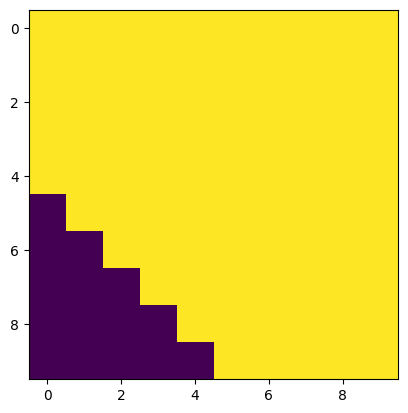

In [210]:
yy2 = McCuloh_Pitts_neuron(x = x_y2, w = np.array([1,1]), bias = -0.5)
yy2=yy2.reshape((10,10))

plt.imshow((yy2 ))
plt.show()

Построим еще одно объединение  - "Уголком"

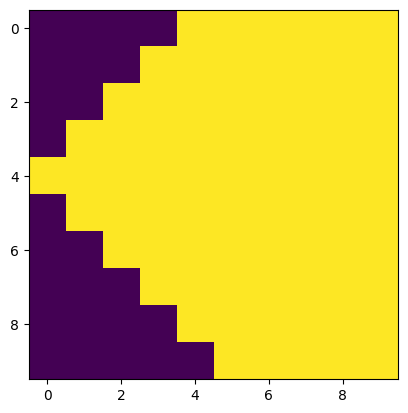

In [212]:
x1 = np.array([np.linspace(-10,11,10).reshape((10,1))]*10).reshape((10,10))
x2 = x1.T
x2=x2.reshape((100,1))
x1=x1.reshape((100,1))

x = np.hstack([x1,x2])

#neuron 1
w = np.array([0.9, -0.9])

y_out_31 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)
#neuron 2
w = np.array([0.9, 0.9])

y_out_32 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)

#второй слой - нейрон 1
x_y3=np.hstack([y_out_31.reshape((100,1)),y_out_32.reshape((100,1))])
x_y3.shape

yy3 = McCuloh_Pitts_neuron(x = x_y3, w = np.array([1,1]), bias = -0.5)
yy3=yy3.reshape((10,10))

plt.imshow((yy3 ))
plt.show()

Схема нейронной модели из 3-х нейронов ;

<img src='3_neurons.png'>


Это уже нейронная сеть!!!!

### Нейронная сеть

Слой - группа нейронов :
    - близкие функции
    - связаны с общим подмножеством нейронов
    
Слой на выходе - выходной

Слой на входе - рецептивный

**Формальная модель сети**


<img src='neuronet.png'>


Возможности сети:

- 2-х слойная сеть {0,1}n - произвольная булева функция (ДНФ)
- 2-х слойная сеть Rn - произвольный выпуклый многогранник
- 3-х слойная сеть Rn - произвольная не обязательно выпуклая область , не обязательно связная
- линейные операции + одна нелинейная - приблизит любу. непрерывную функцию с любой точностью

Пример 2-х слойная сеть Rn - произвольный выпуклый многогранник

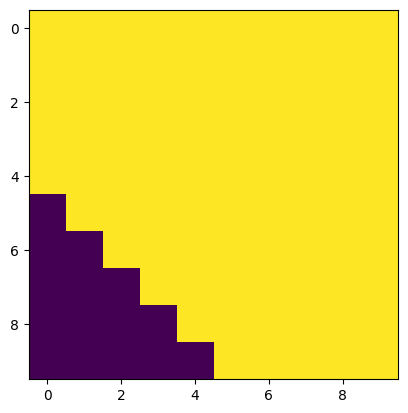

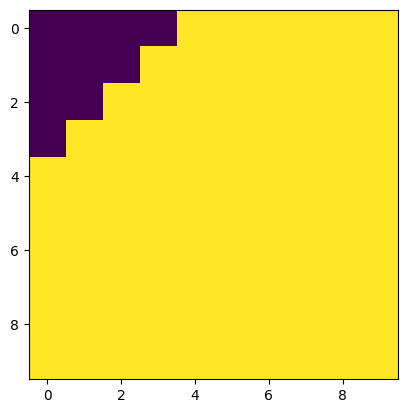

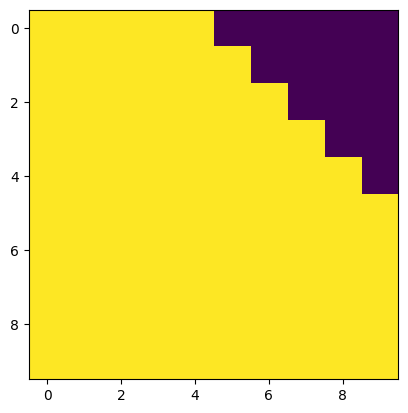

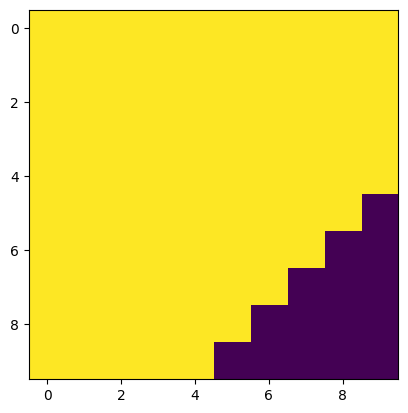

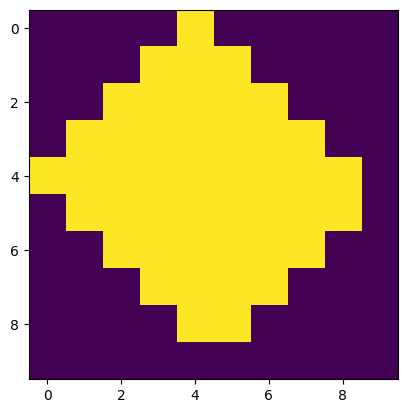

In [213]:
x1 = np.array([np.linspace(-10,11,10).reshape((10,1))]*10).reshape((10,10))
x2 = x1.T
x2=x2.reshape((100,1))
x1=x1.reshape((100,1))

x = np.hstack([x1,x2])

#neuron 1
w = np.array([0.9, -0.9])

y_out_31 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)
plt.imshow((y_out_31.reshape((10,10)) ))
plt.show()
#neuron 2
w = np.array([0.9, 0.9])

y_out_32 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)
plt.imshow((y_out_32.reshape((10,10)) ))
plt.show()
#neuron 3
w = np.array([-0.9, 0.9])

y_out_33 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)
plt.imshow((y_out_33.reshape((10,10)) ))
plt.show()
#neuron 4
w = np.array([-0.9, -0.9])

y_out_34 = McCuloh_Pitts_neuron(x = x, w = w, bias = 10)
plt.imshow((y_out_34.reshape((10,10)) ))
plt.show()


#второй слой - нейрон 1
x_y3=np.hstack([y_out_31.reshape((100,1)),y_out_32.reshape((100,1)), y_out_33.reshape((100,1)), y_out_34.reshape((100,1))])
x_y3.shape

#выходной нейрон - собирает сигнал 4-х нейронов и описывает общую фигуру , т.е. комбинируем 4 линейных границы
yy3 = McCuloh_Pitts_neuron(x = x_y3, w = np.array([0.25,0.25,0.25,0.25]), bias = -0.5)
#yy3 = linear_neuron(x = x_y3, w = np.array([0.24,0.24,0.24,0.24]), bias = 0)
yy3=yy3.reshape((10,10))

plt.imshow((yy3 ))
plt.show()

In [214]:
yy3

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

<img src='https://drive.google.com/uc?export=view&id=1WHFe1TqyDG2bVJKOoNL2YWOFMPbuuTxt'>


3-х слойная сеть Rn - произвольная не обязательно выпуклая область

In [97]:
# Image(filename='8.png', width=600)

<img src='8.png'>

<img src='https://drive.google.com/uc?export=view&id=1FWpEBzvk2WQW99tAuASlaHO3tu09wnaf'>


## Резюме

1. Нейрон - биологическое подобие
2. Нейрон - обучаем
3. Нейрон - простая функция
4. Нейронная сеть - сложная функция
5. Нейронная сеть - обучаема